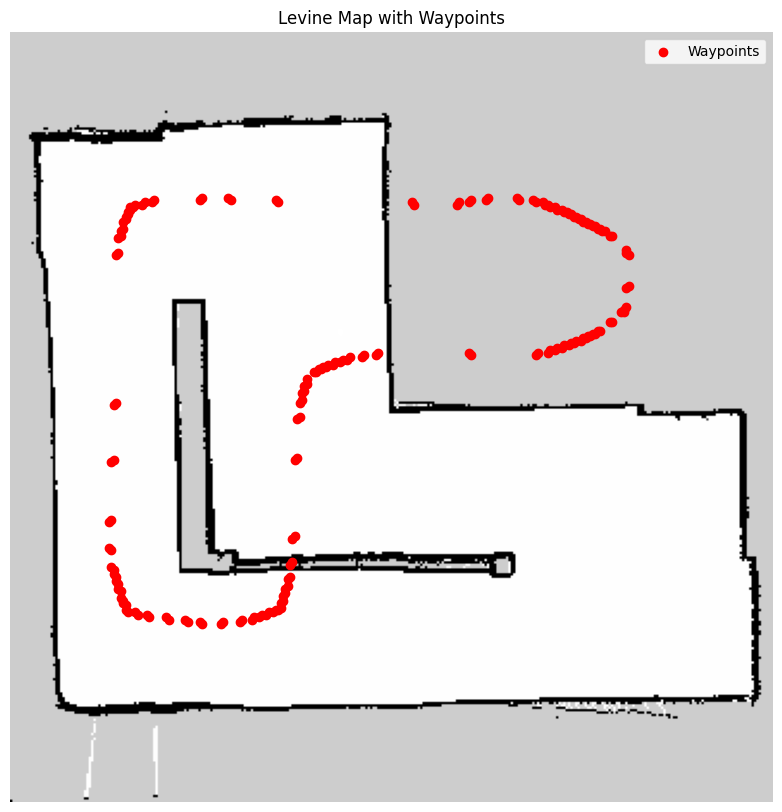

In [22]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from PIL import Image

# First, let's load and parse the YAML file to get the map information
yaml_path = './General1_map.yaml'

with open(yaml_path, 'r') as file:
    yaml_data = yaml.safe_load(file)

# Now let's load the waypoints data
waypoints_path = './General1_centerline.csv'
waypoints_df = pd.read_csv(waypoints_path)

# Parse the map information
levine_image_path = './' + yaml_data['image']
levine_resolution = yaml_data['resolution']
levine_origin = yaml_data['origin']
levine_negate = yaml_data['negate']

# The CSV file does not have headers, so we will assume the first two columns are 'x' and 'y'.
# We will read the CSV file again with no header and assign the correct columns.

# Define column names for the waypoints data
columns = ['x', 'y', 'not_used1', 'not_used2']

# Load the waypoints data with the correct column names
waypoints_df = pd.read_csv(waypoints_path, names=columns)

# Adjust waypoints to world frame using the provided resolution and origin from the YAML file
waypoints_df['world_x'] = (waypoints_df['x'])
waypoints_df['world_y'] = (waypoints_df['y'])
# We have a NameError because 'levine_img' is not defined. It seems we skipped loading the .pgm image file.
# Let's load the Levine map image and plot the waypoints again.

# Load the Levine map image
# levine_img = mpimg.imread(levine_image_path)
# levine_img = Image.open(levine_image_path).transpose(Image.FLIP_TOP_BOTTOM)
levine_img = Image.open(levine_image_path)
# # reverse the image vertically
# levine_img = np.flipud(levine_img)

# Plot the Levine map with waypoints
# %matplotlib tk
plt.figure(figsize=(10, 10))
plt.imshow(levine_img, cmap='gray')
plt.scatter((waypoints_df['world_x'] - levine_origin[0]) / levine_resolution, (waypoints_df['world_y'] - levine_origin[1]) / levine_resolution, c='r', label='Waypoints')
plt.legend()
plt.axis('off')
plt.title('Levine Map with Waypoints')
plt.show()




In [14]:
centerline_waypoints_path = './General1_centerline.csv'
centerline_waypoints_df = pd.read_csv(waypoints_path, header=None)
# set the last two columns (left dis, right dis) to 1.0
centerline_waypoints_df.iloc[:, 2] = 1.0
centerline_waypoints_df.iloc[:, 3] = 1.0
# save the csv file
centerline_waypoints_df.to_csv(centerline_waypoints_path, header=False, index=False)

In [15]:
raceline_waypoints_path = './General1_raceline.csv'
raceline_waypoints_df = pd.read_csv(waypoints_path, header=None)
# set the last two columns (left dis, right dis) to 1.0
raceline_waypoints_df.iloc[:, 2] = 1.0
raceline_waypoints_df.iloc[:, 3] = 1.0
# save the csv file
raceline_waypoints_df.to_csv(raceline_waypoints_path, header=False, index=False)